**Импорт всех необходимых библиотек**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

<b><p>data.csv</p></b>
<ul>
<li>id: id транзакции </li>
<li>timestamp: дата продажи (транзакции) </li>
<li>full_sq: общая площадь  </li>
<li>life_sq: жилая площадь  </li>
<li>floor: этаж  </li>
<li>max_floor: количество этажей в здании </li>
<li>material: материал, из которого изговолены стены  </li>
<li>build_year: год строительства </li>
<li>num_room: количество жилых комнат </li>
<li>kitch_sq: площадь кухни </li>
<li>full_all: количество населения в регионе </li>
<li> state: жилищные условия </li>
<li>sub_area: название территории </li>
<li>price_doc: цена квартиры (целевая переменная) </li>
</ul>

<b><p>macro.csv</p></b>
<ul>
<li>timestamp : дата, на которую актуальны макроэкономические показатели </li>
<li>salary : средняя зарплата в регионе </li>
<li>fixed_basket: стоимость потребительской корзины </li>
<li>rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса </li>
<li>rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса </li>
<li>rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса </li>
<li>average_life_exp: средняя продолжительность жизни в регионе </li>
</ul>

## 1.2 Загрузка данных общее описание набора данных

In [3]:
PATH_base = "https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data.csv"
PATH_add = "https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data_macro.csv"
df = pd.read_csv(PATH_base)
macro =  pd.read_csv(PATH_add)

### 1.2.1 Базовый датасет

Вывести пример данных (первые строки и случайные строки)

In [4]:
print('Head')
display(df.head())

print('Random')
display(df.sample(5))

Head


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,9000000
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,7011550
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,6.0,78616,Severnoe Butovo,7100000
4,8178,2013-05-28,38,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6450000


Random


,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
1136,11013,2013-10-05,32,18.0,7.0,3.0,9.0,1.0,1972.0,1.0,6.0,112221,Chertanovo Juzhnoe,5000000
5726,16587,2014-03-26,50,29.0,4.0,3.0,14.0,1.0,1984.0,2.0,7.0,100846,Dmitrovskoe,7450000
18324,1326,2012-02-25,80,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,122862,Izmajlovo,13971328
7189,18370,2014-05-13,37,18.0,4.0,3.0,25.0,4.0,2009.0,1.0,8.0,156377,Strogino,9000000
8008,19356,2014-06-05,59,46.0,1.0,2.0,5.0,1.0,1962.0,3.0,5.0,123280,Taganskoe,7600000


Размер набора данных

In [5]:
print('df size: ', df.size)
print('df shape: ', df.shape)

print('macro size: ', macro.size)
print('macro shape: ', macro.shape)

df size:  264124
df shape:  (18866, 14)
macro size:  17388
macro shape:  (2484, 7)


Описание типов данных по признакам

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          18866 non-null  int64  
 1   timestamp   18866 non-null  object 
 2   full_sq     18866 non-null  int64  
 3   life_sq     17291 non-null  float64
 4   floor       18838 non-null  float64
 5   state       15505 non-null  float64
 6   max_floor   17445 non-null  float64
 7   material    17445 non-null  float64
 8   build_year  16866 non-null  object 
 9   num_room    17445 non-null  float64
 10  kitch_sq    17445 non-null  float64
 11  full_all    18866 non-null  int64  
 12  sub_area    18866 non-null  object 
 13  price_doc   18866 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 2.0+ MB


# Описание
id - числовой идентификатор

timestamp - дата продажи в формате YYYY-MM-DD

full_sq - общая жилая площадь целочисленная

life_sq: жилая площадь в формате с плавающей точкой, есть пропуски

floor: этаж в формате с плавающей точкой, есть пропуски

state: жилищные условия категориальная величина в формате с плавающей точкой, есть пропуски

max_floor: количество этажей в здании в формате с плавающей точкой, есть пропуски

material: материал, из которого изговолены стены, категориальная величина в формате с плавающей точкой, есть пропуски

build_year: год строительства, величина в формате с плавающей точкой, но предствавлена как object, видимо есть примеси, также есть 
пропуски

num_room: количество жилых комнат, величина в формате с плавающей точкой, есть пропуски

kitch_sq: площадь кухни, величина в формате с плавающей точкой, есть пропуски

full_all: количество населения в регионе, величина целочисленная

sub_area: название территории, представлено как object, но по факту строка

price_doc: цена квартиры (целевая переменная), целочисленная

Базовые статистики по признакам

In [7]:
from pandas import DataFrame

print("numerical features")
display(df.describe())

print("object features")
df.describe(include=[object])

numerical features


,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,18866.0000,18866.0000,17291.0000,18838.0000,15505.0000,17445.0000,17445.0000,17445.0000,17445.0000,1.8866e+04,1.8866e+04
mean,18799.7886,53.9409,34.2592,7.2937,2.2013,12.4233,1.8901,1.9348,7.2064,1.5972e+05,7.5824e+06
std,7082.4287,44.1162,59.9446,5.1912,0.8528,6.2798,1.5061,0.8642,26.9816,3.0435e+05,4.9838e+06
min,9.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,1.0000e+05
25%,13513.2500,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19043.5000,49.0000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6855e+06
75%,24748.7500,63.0000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.0000,7478.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


object features


,timestamp,build_year,sub_area
count,18866,16866,18866
unique,1074,120,146
top,2014-12-16,2014.0,Nekrasovka
freq,133,919,620


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

id - идут не по порядку, пропусков нет

full_sq - большая часть квартир имеет не большую площадь ~ 50 метров, есть либо пропуски, либо недвижимость без жилищной площади. Максимальное в ~100 раз превышает среднее и медиану

life_sq - в среднем меньше общей площади ~18-20 метров
floor - в основном покупают квартиры 6-8 этаже, есть информация о продаже небоскребов

state - есть 4 категории, возможно есть ошибка тк максимальное значение 33

max_floor - по какой-то причине есть продажа на 77 этаже, но максимальный этаж в проданном доме 57

material - категориальная величина, большая часть домов построена из материала по категорией 1

num_room - большая часть продаж приходится на 1/2/3 комнатные

kitch_sq - небольшой межинтервальный размах, но очень большое стандартное отклонение, возможно очень много выбросов

full_all - информация о продажа собрана в небольших регионах с население в среднем до 500 тысяч

price_doc - большая часть квартир стоит около 5-10 млнов

timestamp - возможно данные представлены за 3 года

build_year - большая часть домов была построена в 2014 году

sub_area - Nekrasovka - самый частый пункт продажи квартир

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

Площадь жилая и общая - тк прямопропорционально влияет на цену

Количество комнат - прямопропорционально влияет на цену, тк чем больше комнат тем обычно больше площадь

год постройки - чем новее тем дороже, старые дома ценятся хуже

этаж - есть мнение что с 4-6 этаж лучше воздух и меньше шума, нужно проверить эту гипотезу

площадь кухни - гипотеза, площадь кухни прямопрапорционально влияет на цену

регион - в пунктах с большим населением, цена выше

timestamp - из-за инфляции чем позже была куплена тем выше цена в абсолютном значении

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [8]:
for column in df.columns:
    print(f'{column} skips: ', df[column].shape[0] - df[column].dropna().shape[0])

id skips:  0
timestamp skips:  0
full_sq skips:  0
life_sq skips:  1575
floor skips:  28
state skips:  3361
max_floor skips:  1421
material skips:  1421
build_year skips:  2000
num_room skips:  1421
kitch_sq skips:  1421
full_all skips:  0
sub_area skips:  0
price_doc skips:  0


Есть ли аномальные данные в стллбцах? Если да, то укажите на них и объясните, почему считаете аномальными

In [9]:
print(df.full_sq.max() - df.life_sq.max()) # Жилищная площадь превышает общую площадь
print(df.kitch_sq.max()) # Очень большая площадь кухни
print(df.num_room.min()) # Помещение без комнат, возможно подсовки
print(df.state.value_counts()) # Есть выброс категория 33
print(df.full_sq.min()) # Есть помещения без прощади

-2152.0
2014.0
0.0
2.0     5823
3.0     5754
1.0     3506
4.0      421
33.0       1
Name: state, dtype: int64
0


### 1.2.2 Макро показатели

Вывести пример данных (первые строки и случайные строки)

In [10]:
display(macro.head())
display(macro.sample(5))

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,2010-01-01,38410.5,11443.63,NaN,NaN,NaN,74.2
1,2010-01-02,38410.5,11443.63,NaN,NaN,NaN,74.2
2,2010-01-03,38410.5,11443.63,NaN,NaN,NaN,74.2
3,2010-01-04,38410.5,11443.63,NaN,NaN,NaN,74.2
4,2010-01-05,38410.5,11443.63,NaN,NaN,NaN,74.2


,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
1470,2014-01-10,61208.0,15608.27,47.04,41.44,33.49,76.70
2078,2015-09-10,64310.0,19088.53,50.07,39.06,30.69,76.77
439,2011-03-16,44898.7,12882.90,41.58,34.86,28.04,75.79
1428,2013-11-29,55485.2,15367.58,49.29,42.02,34.55,76.37
1616,2014-06-05,61208.0,16295.00,48.70,41.18,33.06,76.70


Размер набора данных

In [11]:
display(macro.shape)
display(macro.size)

(2484, 7)

17388

Описание типов данных по признакам

In [12]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2191 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2211 non-null   float64
 4   rent_price_2room_eco  2211 non-null   float64
 5   rent_price_1room_eco  2211 non-null   float64
 6   average_life_exp      2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


Базовые статистики по признакам

In [13]:
print('numerical features: ')
display(macro.describe())
print('object features: ')
macro.describe(include=[object])

numerical features: 


,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,2191.0000,2484.0000,2211.0000,2211.0000,2211.0000,2191.0000
mean,52188.9331,15331.4980,47.2997,38.8954,31.0024,75.9282
std,9068.5590,2789.1363,3.0702,5.0352,3.9841,0.8699
min,38410.5000,11443.6300,37.5400,0.1000,2.3100,74.2000
25%,44898.7000,12992.4400,45.5300,37.9300,29.7800,75.7400
50%,48830.4000,14983.9200,47.3500,39.4700,31.1100,75.7900
75%,61208.0000,18295.0700,49.3500,41.3000,33.0600,76.7000
max,64310.0000,20422.5000,53.2100,43.8500,35.3700,76.7700


object features: 


,timestamp
count,2484
unique,2484
top,2010-01-01
freq,1


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

Salary - без особых выбросов, похоже на нормальное распределение

fixed_basket - В среднем составляет треть от зарплаты, без особых выбросов

rent_price_3room_eco - похоже, что указано в e-3 степени. Небольшое отлокнение. Соответствует рыночной конъюктуре

rent_price_2room_eco - есть выброс в минимальном значении. Соответствует рыночной конъюктуре

rent_price_1room_eco - похожее на выброс минимальное значение. Соответствует рыночной конъюктуре

average_life_exp - очень кучное распределение. Без выбросов

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

### Кажется здесь опечатка в вопросе

Salary - от средней зарплаты зависит цена аренды квартир и продолжительность жизни

fixed_basket - растет при росте salary

rent_price_3room_eco, rent_price_2room_eco, rent_price_1room_eco - гипотеза, стоимость аренды прямо кореллируем с зарплатой в регионе

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [14]:
for column in macro.columns:
    if skips := macro[column].shape[0] - macro[column].dropna().shape[0]:
        print(f'{column} skips: ', skips)

salary skips:  293
rent_price_3room_eco skips:  273
rent_price_2room_eco skips:  273
rent_price_1room_eco skips:  273
average_life_exp skips:  293


Есть ли аномальные данные в стллбцах? Если да, то укажите на них и объясните, почему считаете аномальными

In [15]:
macro.rent_price_2room_eco.min() # Выброс или ошибочное значение
# Остальные показатели находятся в границах своих распределений

0.1

## 1.3 Замените все ранее найденные ошибочные данные на None. Заполните все пропуски в данных: которые были и которые появились. Используйте как стратегии изученные на занятии, так и логику, которая вытекает из самих данных

### 1.3.1 Главный набор данных

In [16]:
def fill_by_median(data: pd.DataFrame, feature: str):
    mean = data[feature].median()    
    data.loc[data[feature].isna(), feature] = mean
    
# Verification
def verify_data_frame(*, df: pd.DataFrame, df_name: str):
    if skips_info := verify_skips(df):
        for column, skips in skips_info:
            print(f'Data frame \'{df_name}\' contains {skips} skips in column {column}')
    else:
        print(f'There are no skips in data frame {df_name}')

def verify_skips(data: pd.DataFrame):
    skips = []
    for column in data:
        mask = data[column].isna()
        if number_of_skips := data[mask][column].shape[0]:
            skips.append((column, number_of_skips))
    
    return skips


In [17]:
df_copy = df.copy()

df_copy.build_year = pd.to_numeric(df_copy.build_year, errors='coerce')

columns_to_fill = []
for column in df_copy.columns:
    if skips := df_copy[column].shape[0] - df_copy[column].dropna().shape[0]:
        columns_to_fill.append(column)
        print(f'{column} skips: ', skips)

for column in columns_to_fill:
    df_copy.loc[df_copy[column].isna(), column] = np.nan
    
# numerical feature filling
for feature in columns_to_fill:
    fill_by_median(df_copy, feature)

print('')
verify_data_frame(df=df, df_name='source')
print('')
verify_data_frame(df=df_copy, df_name='cleaned copy')

life_sq skips:  1575
floor skips:  28
state skips:  3361
max_floor skips:  1421
material skips:  1421
build_year skips:  2001
num_room skips:  1421
kitch_sq skips:  1421

Data frame 'source' contains 1575 skips in column life_sq
Data frame 'source' contains 28 skips in column floor
Data frame 'source' contains 3361 skips in column state
Data frame 'source' contains 1421 skips in column max_floor
Data frame 'source' contains 1421 skips in column material
Data frame 'source' contains 2000 skips in column build_year
Data frame 'source' contains 1421 skips in column num_room
Data frame 'source' contains 1421 skips in column kitch_sq

There are no skips in data frame cleaned copy


### 1.3.2 Набор с макропоказателями

#### Заполнение через предыдущий или последующий элемент, тк данные отсортированы и представляют собой

In [18]:
def fill_by_adjacent(data: pd.DataFrame, feature: str):
    data[column] = data[column].fillna(method='bfill')
    
    mask = data[column].isna()
    if data[mask][column].shape[0]:
        data[column] = data[column].fillna(method='ffill')

In [19]:
macro_copy = macro.copy()

# verify that data frame is sorted by date
macro_copy.timestamp = pd.to_datetime(macro_copy.timestamp)
macro_copy.sort_values(by='timestamp')

columns_to_fill = []
for column in macro_copy.columns:
    mask = macro_copy[column].isna()
    if skips := macro_copy[mask][column].shape[0]:
        columns_to_fill.append(column)
        print(f'{column} skips: ', skips)

for column in columns_to_fill:
    fill_by_adjacent(macro_copy, column)

print('origin data frame verification: ')
verify_data_frame(df=macro, df_name='source')
print('cleaned data frame verification: ')
verify_data_frame(df=macro_copy, df_name='cleaned macro')


salary skips:  293
rent_price_3room_eco skips:  273
rent_price_2room_eco skips:  273
rent_price_1room_eco skips:  273
average_life_exp skips:  293
origin data frame verification: 
Data frame 'source' contains 293 skips in column salary
Data frame 'source' contains 273 skips in column rent_price_3room_eco
Data frame 'source' contains 273 skips in column rent_price_2room_eco
Data frame 'source' contains 273 skips in column rent_price_1room_eco
Data frame 'source' contains 293 skips in column average_life_exp
cleaned data frame verification: 
There are no skips in data frame cleaned macro


## 1.4 Обогатите основной набор данных данными из макропоказателей и поместите в переменную `df_full`

In [20]:
df_copy.timestamp = pd.to_datetime(df_copy.timestamp) # macro_copy.timestamp уже с нужным типом
df_full = df_copy.merge(macro_copy, on='timestamp', how='left')
df_full

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000,55485.2,14983.92,47.35,40.77,2.31,76.37
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,9000000,55485.2,14983.92,47.35,40.77,2.31,76.37
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,7011550,55485.2,14983.92,47.35,40.77,2.31,76.37
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,6.0,78616,Severnoe Butovo,7100000,55485.2,14983.92,47.35,40.77,2.31,76.37
4,8178,2013-05-28,38,20.0,15.0,2.0,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6450000,55485.2,14983.92,47.35,40.77,2.31,76.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,21562,2014-08-15,78,30.0,14.0,2.0,0.0,6.0,1979.0,2.0,0.0,7341,Poselenie Moskovskij,7722029,61208.0,16134.39,52.81,43.11,34.83,76.70
18862,4796,2012-11-19,99,91.0,20.0,2.0,12.0,1.0,1979.0,2.0,7.0,28179,Basmannoe,14800000,48830.4,13872.82,48.97,40.83,32.93,75.74
18863,466,2011-11-25,38,24.0,1.0,2.0,12.0,1.0,1979.0,2.0,7.0,142462,Mozhajskoe,6300000,44898.7,12959.49,46.50,38.62,31.53,75.79
18864,27416,2015-01-21,77,30.0,11.0,2.0,0.0,1.0,1979.0,3.0,0.0,39873,Poselenie Shherbinka,5966828,64310.0,17817.40,52.64,43.29,33.88,76.77


## 1.5 Проверьте данные на наличие выбросов. По каждому столбцу. Напишите своё мнение: нужно ли в каждой из ситуаций обрабатывать выбросы, или можно оставить. Если нужно обработать, то примените один из изученных подходов, либо предложите свой

### 1.5.1 Главный набор данных

In [21]:
def draw_boxplot(data: DataFrame, exclude=None):
    exclude = exclude or set()
    for column in data.columns:
        if (column in exclude) or (column == 'id'):
            continue

        feature = data[column]
        if feature.dtype in [np.int_, np.float_]:
            sns.boxplot(feature)
            plt.legend(labels=[column])
            plt.yscale('log')
            plt.show()

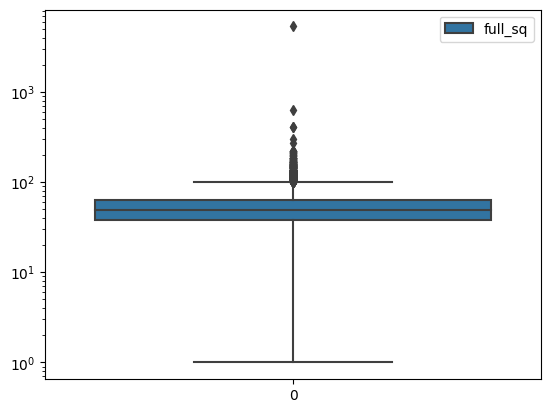

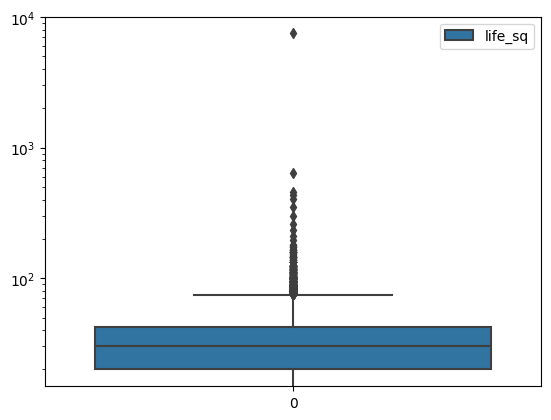

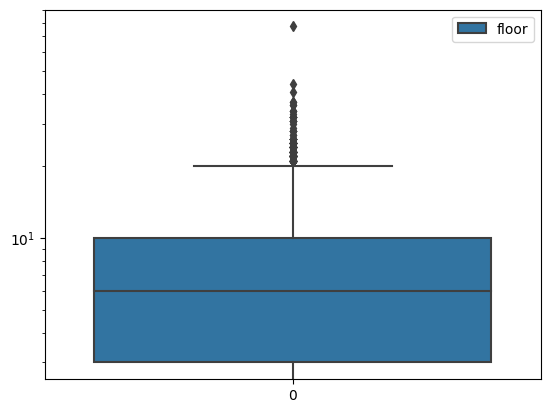

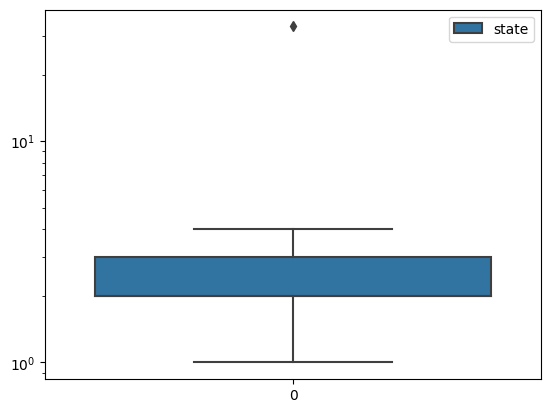

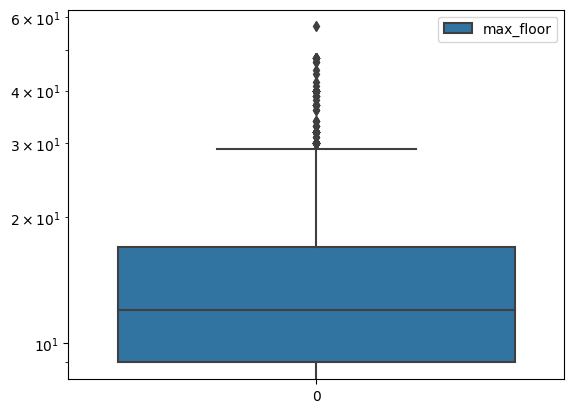

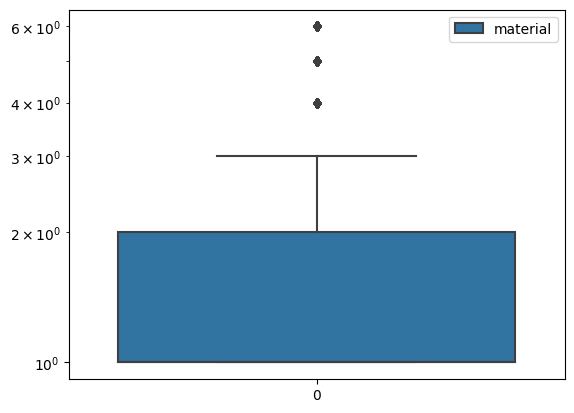

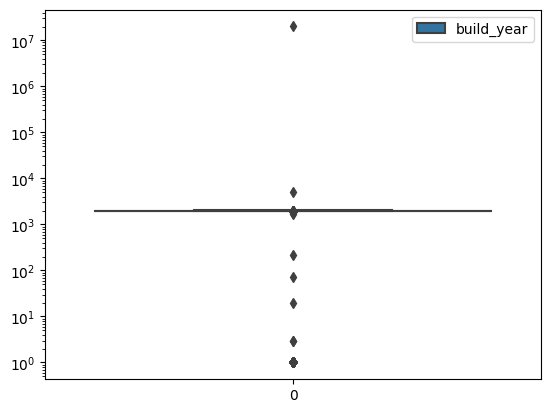

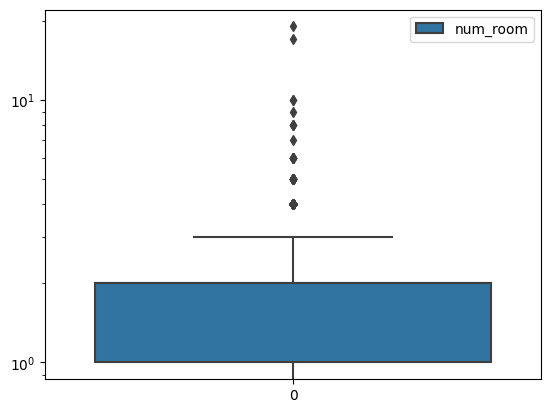

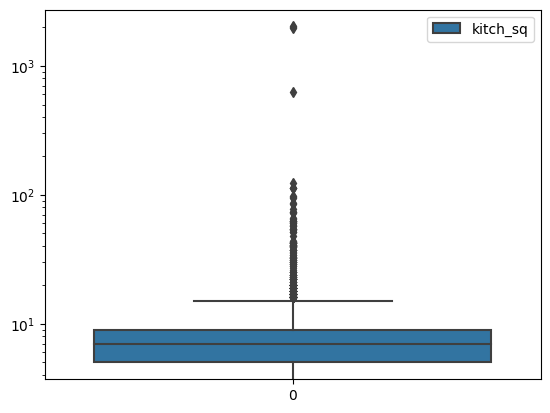

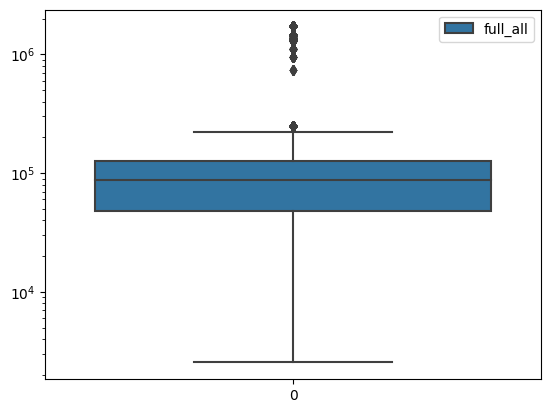

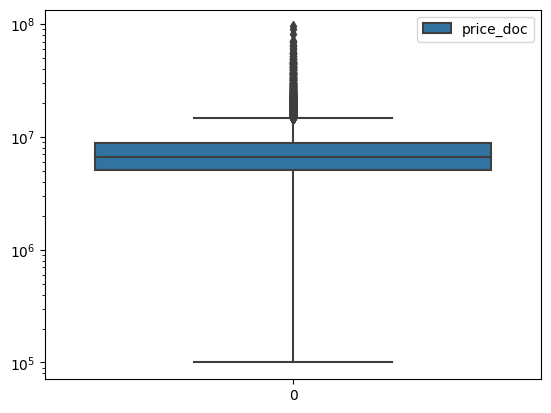

In [22]:
draw_boxplot(df_copy)
# full_sq, life_sq - определенно обладает выбросами которые хотелось бы `сгладить`
# floor, max_floor - обладает выбросами, гипотетически предполагаю что их можно оставить
# state - выглядит как единичная ошибка в наборе данных
# material - выглядит особенность данных, которую не нужно воспринимать как выброс
# build_year - ошибочные данные, их стоит исправить
# num_room, kitch_sq - нужно обработать выбросы
# price_doc - стоит обработать выбросы

# Smoothing

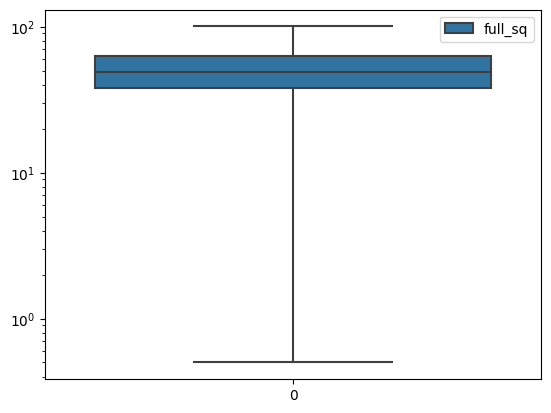

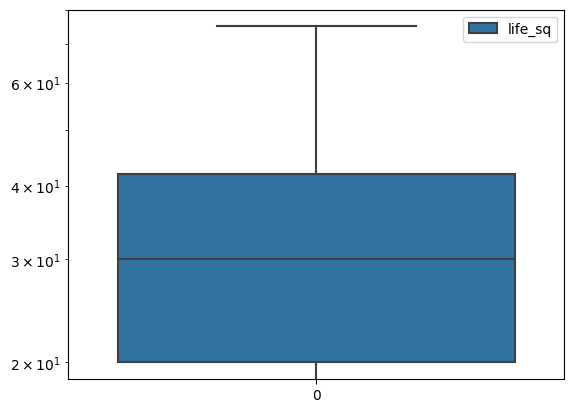

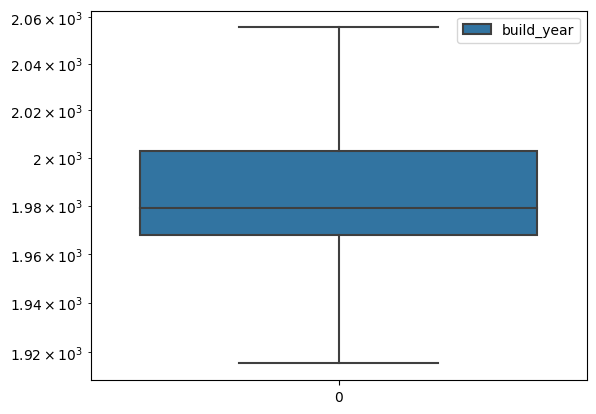

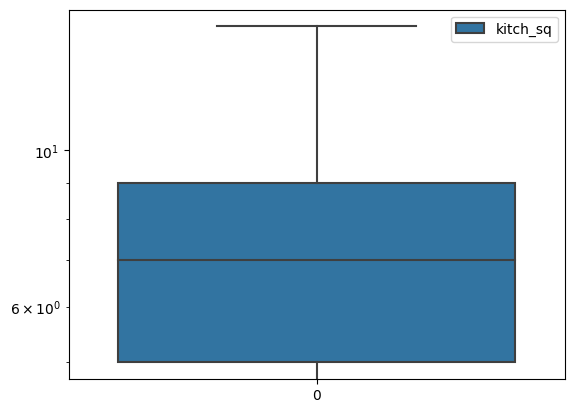

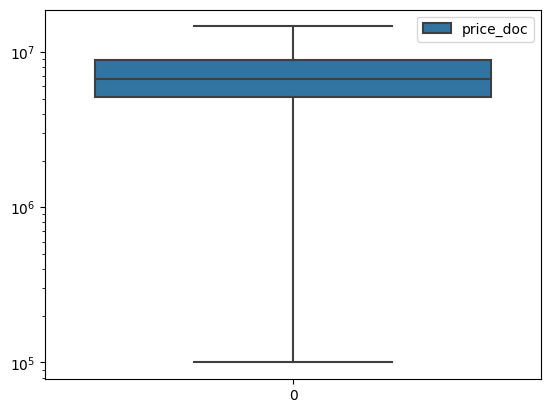

In [23]:
def smooth_by_quartile(data: DataFrame, feature: str):
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

columns_to_smooth = set(['full_sq', 'life_sq', 'kitch_sq', 'price_doc', 'build_year'])
columns_to_exclude = set(df_copy.columns).difference(columns_to_smooth)
for column in df_copy[list(columns_to_smooth)].columns:
    smooth_by_quartile(df_copy, column)

# Verify
draw_boxplot(df_copy, exclude=columns_to_exclude)


### 1.5.2 Набор с макропоказателями

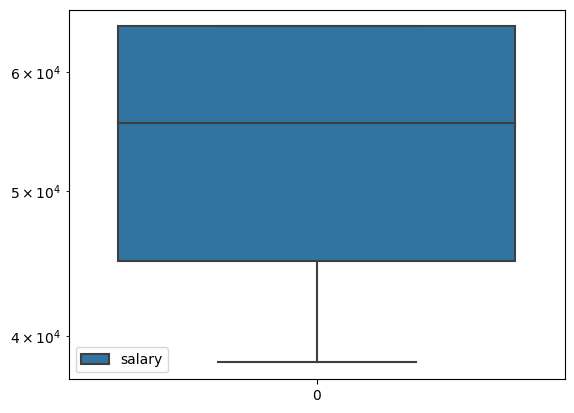

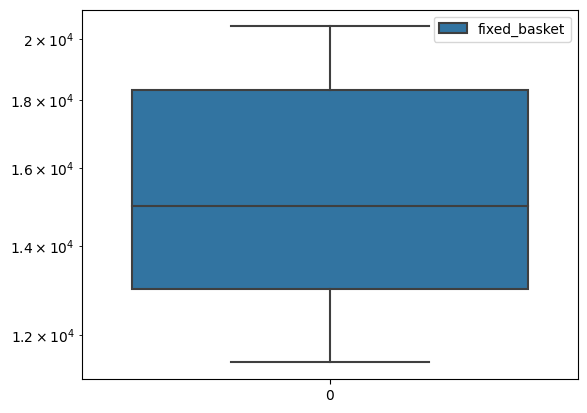

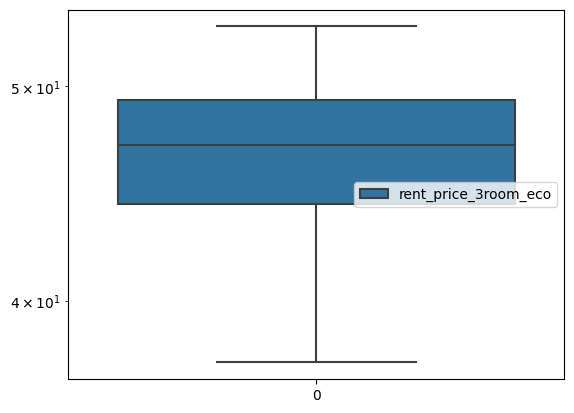

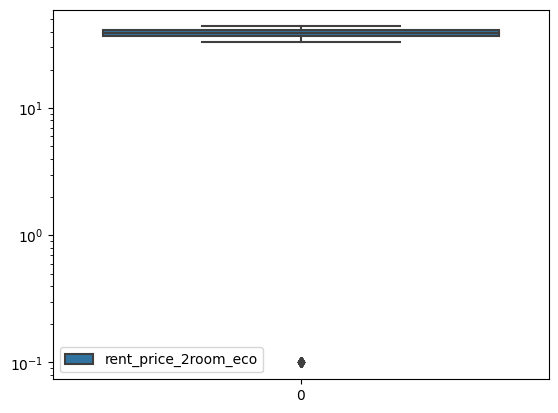

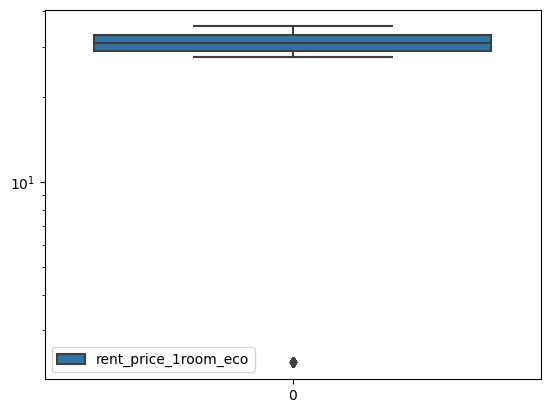

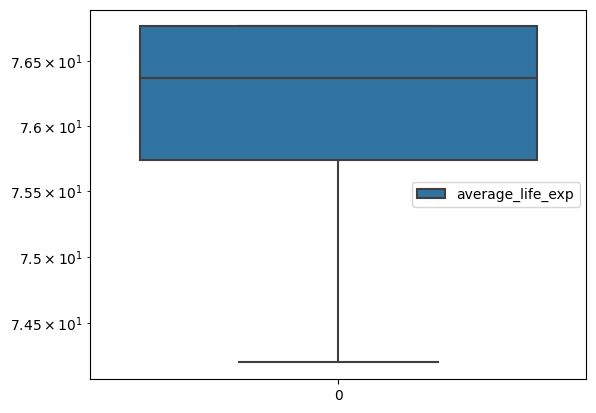

In [24]:
draw_boxplot(macro_copy)
# salary, fixed_basket, average_life_exp, rent_price_3room_eco - не наблюдаю выбросы
# rent_price_2room_eco, rent_price_1room_eco - есть странные выбросы, которые можно удалить 
#   или прировнаять к соответствующим значениям Q1 и Q3

# Smoothing macro

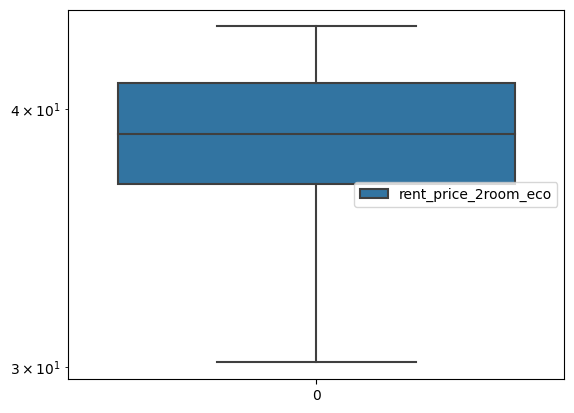

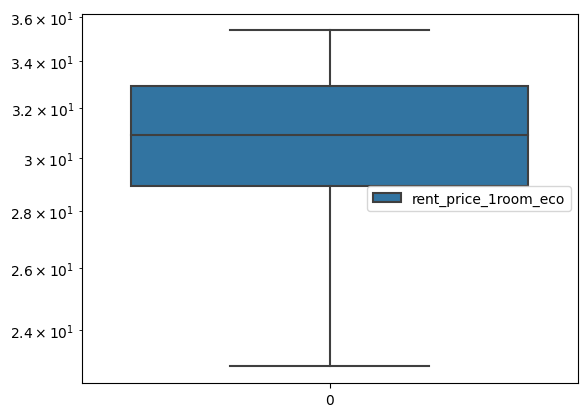

In [25]:
columns_to_smooth = set(['rent_price_2room_eco', 'rent_price_1room_eco'])
columns_to_exclude = set(macro_copy.columns).difference(columns_to_smooth)
for column in macro_copy[list(columns_to_smooth)].columns:
    smooth_by_quartile(macro_copy, column)

# Verify
draw_boxplot(macro_copy, exclude=columns_to_exclude)

## 1.6 Создайте не менее 5 новых признаков на основе существующих данных. Опишите текстом обоснование создания каждой. Признаки должны привносить некую новую информацию для понимания цены квартиры

In [26]:
df_full['average_rent_price'] = (
    df_full['rent_price_3room_eco'] +
    df_full['rent_price_2room_eco'] +
    df_full['rent_price_1room_eco']
) / 3

df_full['life_square_ratio'] = (
    df_full['life_sq'] / df_full['full_sq'] * 100
)

df_full['number_of_salaries_to_buy_apartment'] = df_full['price_doc'] / df_full['salary']

df_full['square_meter_price'] = df_full['price_doc'] / df_full['full_sq']

exclude_list = ['num_room', 'state']

for column in df_full.columns:
    if df_full[column].dtype not in [np.int_, np.float_]:
        continue
    if column in exclude_list:
        continue
    
    smooth_by_quartile(df_full, column)
    
def smooth_by_mode(df: DataFrame, columns: list[str]):
    for column in columns:
        q1 = df[column].quantile(.25)
        q3 = df[column].quantile(.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[column] = np.where(df[column] < lower_bound, df[column].mode(), df[column])
        df[column] = np.where(df[column] > upper_bound, df[column].mode(), df[column])

smooth_by_mode(df_full, ['state'])

df_full['novelty_of_building'] = pd.cut(df_full['build_year'], 
                                        bins=4, 
                                        labels=['very old', 'old', 'modern', 'new'])

# average_rent_price - средняя цена аренды квартиры, должно прямопропорционально влиять на цену
# life_square_ratio - коэффициент жилой площади, полезен чтобы судить о типе помещения и формировать об этом цену
# number_of_salaries_to_buy_apartment - количество зарплат, чтобы купить этот апартамент
# square_meter_price - полезно для анализа цены
# novelty_of_building - категориальная величина позволяющая судить о новизне постройки

df_full.sample(10)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,...,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,average_rent_price,life_square_ratio,number_of_salaries_to_buy_apartment,square_meter_price,novelty_of_building
2060,12139.0,2013-11-14,35.0,14.0,9.0,2.0,12.0,1.0,1996.0,1.0,...,15367.58,49.29,42.02,34.55,76.37,41.9533,40.0000,99.1255,157142.8571,modern
10432,22312.0,2014-09-08,84.0,52.0,5.0,2.0,14.0,1.0,2002.0,3.0,...,16165.30,51.41,43.26,34.52,76.70,43.0633,61.9048,236.8971,172619.0476,modern
1020,10867.0,2013-10-01,46.0,29.0,8.0,3.0,9.0,1.0,1973.0,2.0,...,15285.65,48.28,41.96,34.52,76.37,41.5867,63.0435,112.6427,135869.5652,old
15368,28520.0,2015-03-23,70.0,40.0,5.0,3.0,6.0,2.0,1933.0,3.0,...,18495.74,50.41,40.49,31.35,76.77,40.7500,57.1429,181.9313,167142.8571,very old
1479,11432.0,2013-10-22,39.0,21.0,7.0,3.0,14.0,1.0,1991.0,1.0,...,15285.65,48.28,41.96,34.52,76.37,41.5867,53.8462,106.3347,151282.0513,modern
3465,13869.0,2014-01-18,100.5,75.0,5.0,1.0,15.0,3.5,2010.0,4.0,...,15608.27,47.04,41.44,33.49,76.70,40.6567,53.5519,242.7649,280969.8487,modern
10244,22077.0,2014-09-01,43.0,1.0,3.0,1.0,12.0,1.0,2014.0,1.0,...,16165.30,51.41,43.26,34.52,76.70,43.0633,31.5789,51.6918,73580.2326,modern
1039,10890.0,2013-10-01,41.0,20.0,6.0,3.0,14.0,1.0,1984.0,1.0,...,15285.65,48.28,41.96,34.52,76.37,41.5867,48.7805,120.5727,163170.7317,old
2943,13233.0,2013-12-18,39.0,19.0,14.0,2.0,17.0,1.0,1985.0,1.0,...,15417.34,48.50,42.00,33.97,76.37,41.4900,48.7179,81.1027,115384.6154,old
8740,20281.0,2014-06-27,40.0,27.0,3.0,2.0,5.0,2.0,1965.0,2.0,...,16295.00,48.70,41.18,33.06,76.70,40.9800,67.5000,32.6755,50000.0000,old


## 1.7 Провести визуальный анализ всех признаков

Ко всем графикам писать выводы текстом. Что вы видите, почему построили именно такую диаграмму

### 1.7.1 Анализ признаков по отдельности (где нужно делать группировки, преобразования категориальных типов данных к числовым, смотреть в разрезе других категориальных признаков)

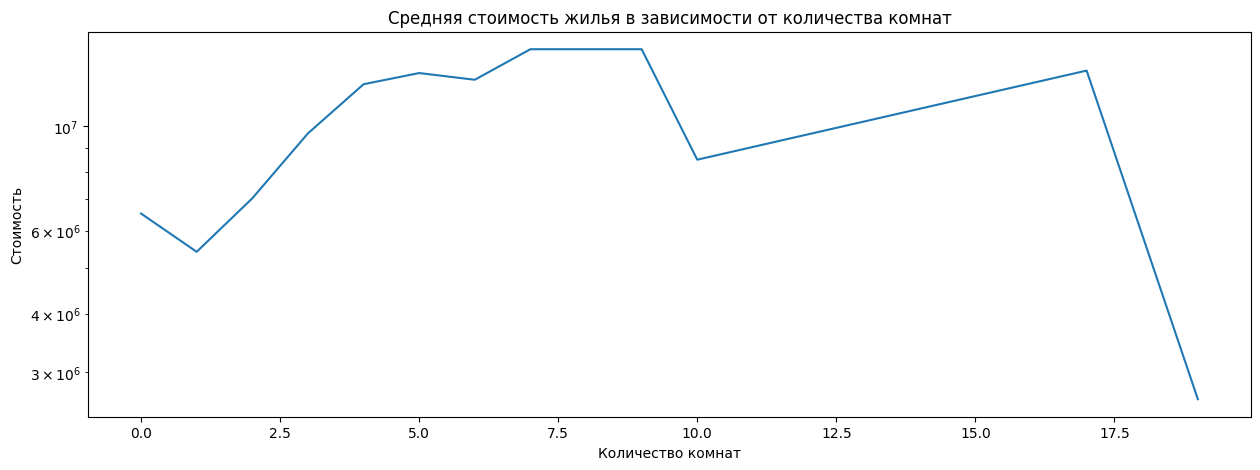

In [27]:
gr = df_full.groupby('num_room')['price_doc'].mean()
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_yscale('log')
ax.set_title(('Средняя стоимость жилья в зависимости от количества комнат'))
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Стоимость')
ax.plot(gr)

(array([6169., 8191., 4052.,  391.,   36.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

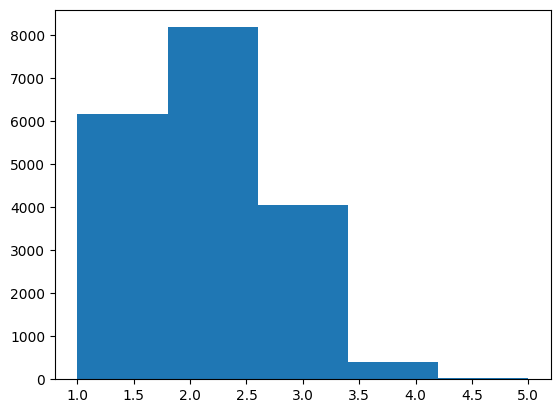

In [28]:
mask = (df_full['num_room'] >= 1) & (df_full['num_room'] <= 5)
plt.hist(df_full[mask]['num_room'], bins=5)

## Промежуточный вывод, стоит сфокусировать рассмотрение цен в зависимости от комнат в срезе от 1 до 5 комнат
Так как остальные квартиры размывают основную часть квартир

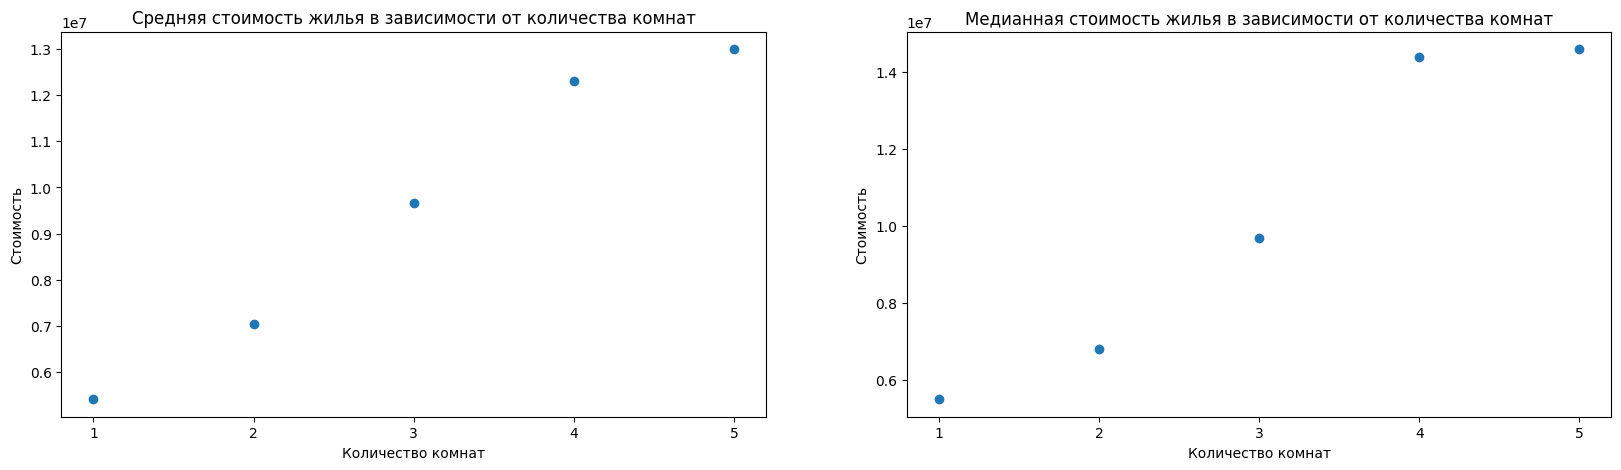

In [29]:
gr = df_full[mask].groupby('num_room')['price_doc'].agg(['mean', 'median'])
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1.set_title(('Средняя стоимость жилья в зависимости от количества комнат'))
ax1.set_xlabel('Количество комнат')
ax1.set_ylabel('Стоимость')
ax1.set_xticks(gr.index)
ax1.scatter(gr.index, gr['mean'])

ax2.set_title(('Медианная стоимость жилья в зависимости от количества комнат'))
ax2.set_xlabel('Количество комнат')
ax2.set_ylabel('Стоимость')
ax2.set_xticks(gr.index)
ax2.scatter(gr.index, gr['median'])

## Выводы:
## Можем наблюдать, что средняя цена в пределах от одной до 5 комнатной квартиры растет практически линейно
## А медианная цена для 4-х комнатной практически такая же как для 5 комнатной, возможно поэтому стоит сфокусировать анализ на 1-4 комнатных, тк на наиболее востребованные

,mean,median
year_range,,
"(1915.36, 1920.5]",6.5701e+06,6.1147e+06
"(1920.5, 1925.5]",1.1425e+07,1.0950e+07
"(1925.5, 1930.5]",1.1560e+07,1.3150e+07
"(1930.5, 1935.5]",1.0672e+07,1.1000e+07
"(1935.5, 1940.5]",1.2098e+07,1.4500e+07
...,...,...
"(2030.5, 2035.5]",NaN,NaN
"(2035.5, 2040.5]",NaN,NaN
"(2040.5, 2045.5]",NaN,NaN


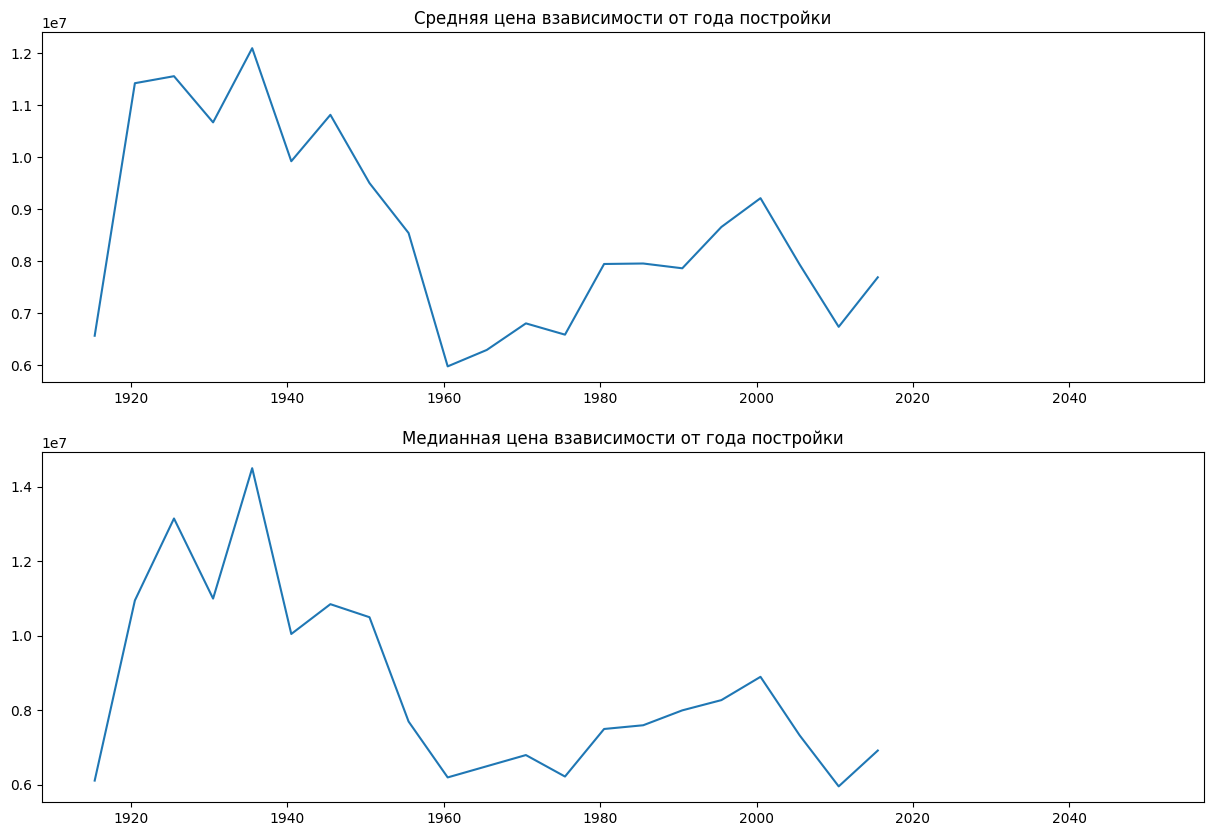

In [30]:
df_full_masked = df_full[mask].copy()
bins_count = int((df_full_masked['build_year'].max() - df_full_masked['build_year'].min()) // 5)
df_full_masked['year_range'] = pd.cut(df_full_masked['build_year'], bins_count)

year_gr = df_full_masked.groupby('year_range')['price_doc'].agg(['mean', 'median'])
display(year_gr)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

for index, column in enumerate(year_gr.columns):
    axes[index].plot(year_gr.index.to_series().apply(lambda x: x.left), year_gr[column])
    axes[index].set_title(('Средняя' if index == 0 else 'Медианная') + ' цена взависимости от года постройки')
    
# Есть какие-то странные выбросы в стоимости домов построенных в период с 1920 - 1955
# В целом средня цена за дома построенные в период 2000, выше на 0.5-1.5 пункта, чем на дома построенные в период 1960-1990

### 1.7.2 Анализ совместного влияния признаков и их влияния на целевой признак

Text(0.5, 1.0, 'Зависимость цены кв.метра от процента жилой площади')

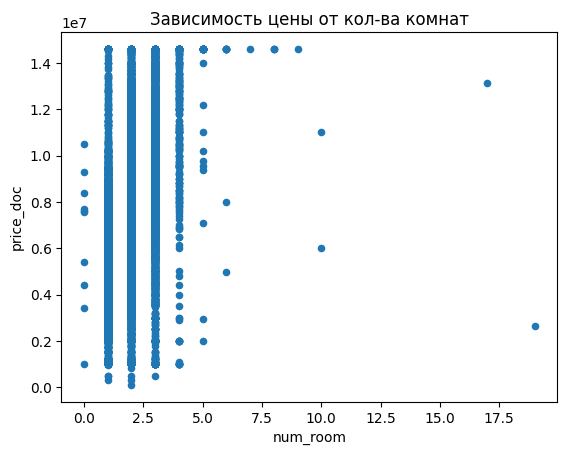

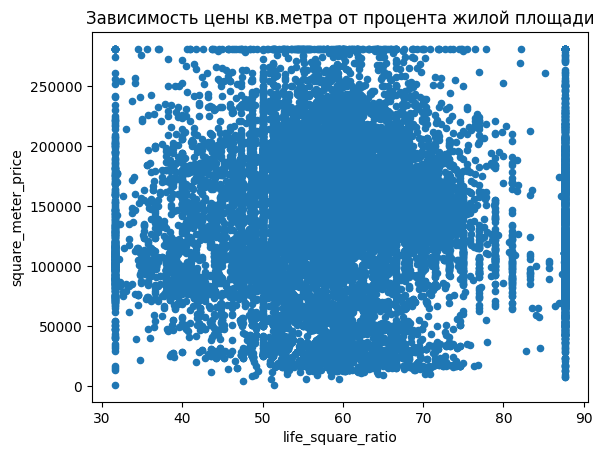

In [31]:
df_full.plot.scatter(x='num_room', y='price_doc')
ax = plt.gca()
ax.set_title('Зависимость цены от кол-ва комнат')
# В диапоазоне от 1 до 4 комнатной цена сильно варьируется, возможно это связано с выбрасами цены, но это целевой параметр который не хочется менять

df_full[mask].plot.scatter(x='life_square_ratio', y='square_meter_price') # Слишком кучные данные, не прослеживается связь
ax = plt.gca()
ax.set_title('Зависимость цены кв.метра от процента жилой площади')

<AxesSubplot: >

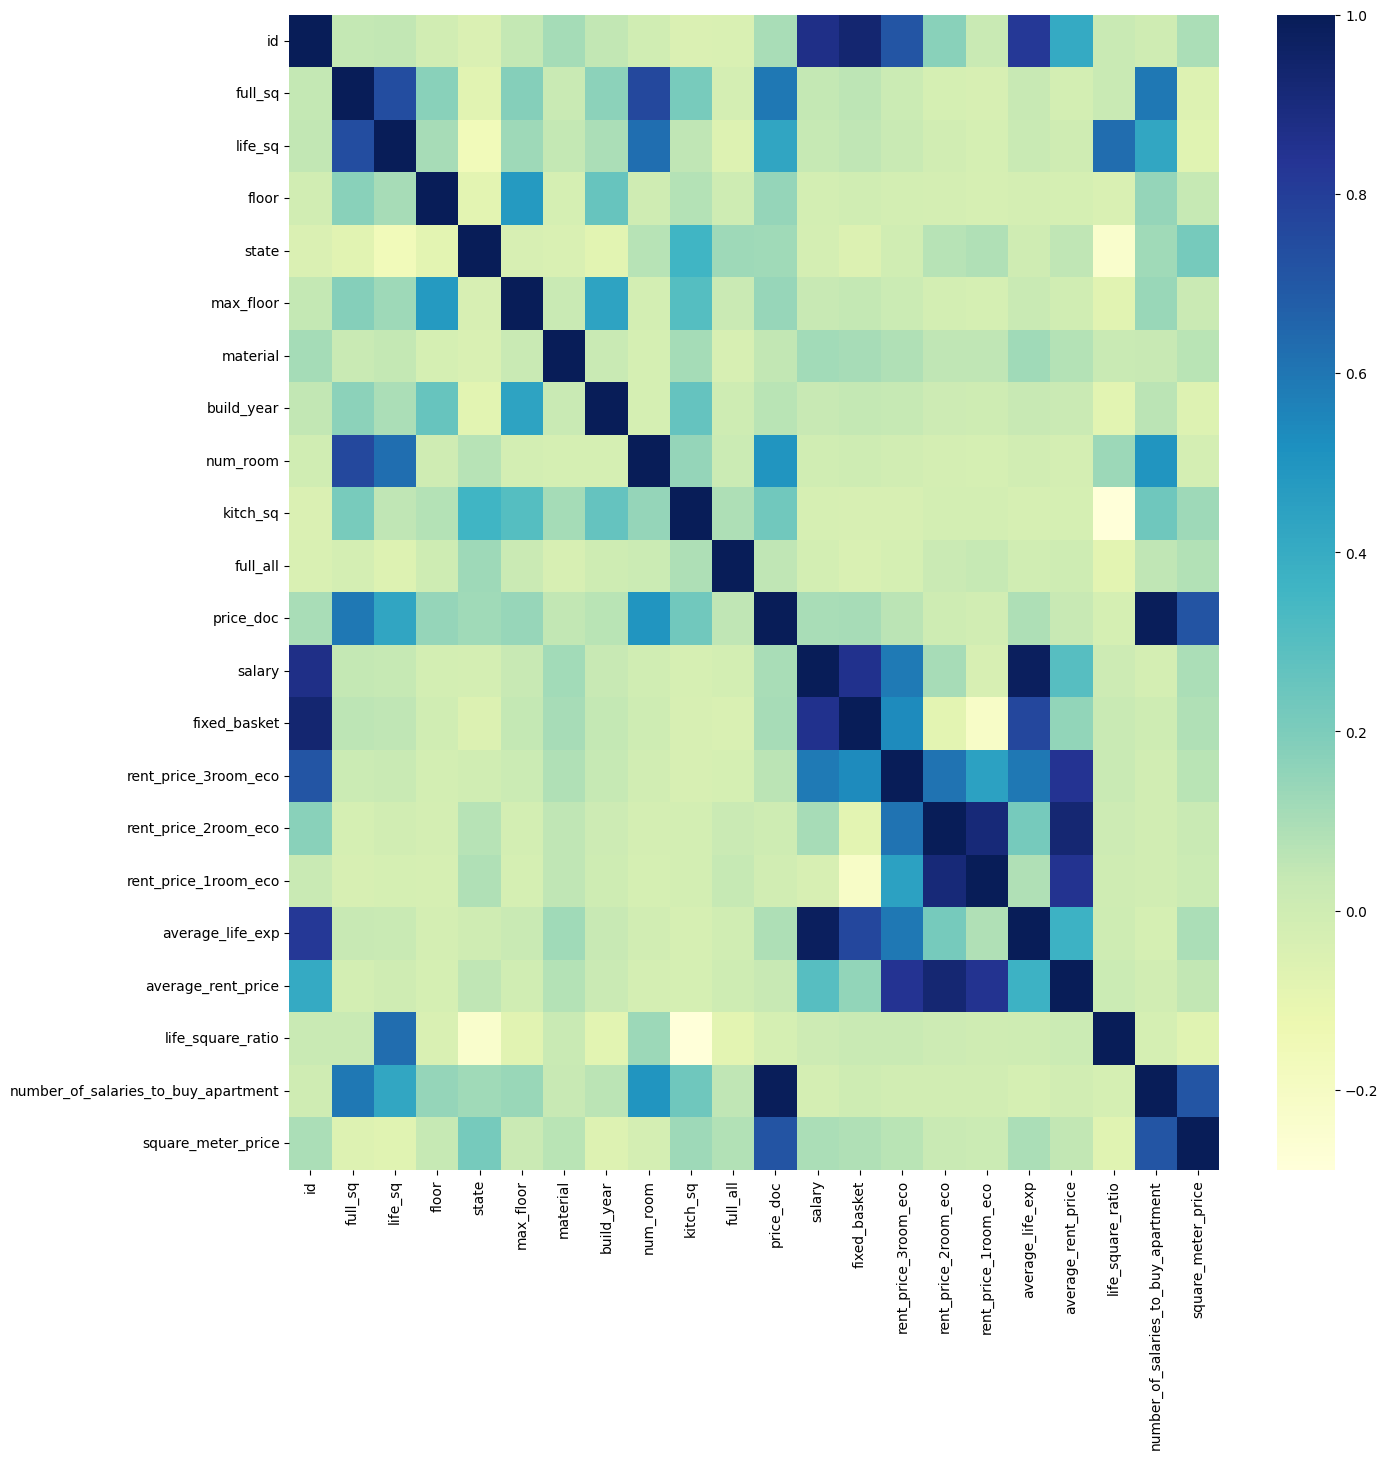

In [32]:
plt.figure(figsize=(15, 15))
numeric_data = df_full.select_dtypes(np.number)
sns.heatmap(numeric_data[mask].corr(), cmap="YlGnBu")

### Выводы по матрице корреляции:
#### Цена прямопропорциональна общей и жилой площади квартиры
#### Количество комнат влияет на цену практически линейно
#### Цена квадратного метра имеет прямую корреляцию с категориальным признаком `state`
#### Ожидание продолжительности жизни влияет на уровень зарплат и потребительскую корзину, нужно посмотреть в разрезе цен на жилье, полагаю есть связь

Text(0.5, 1.0, 'Зависимость цены жилье от состояния жилья')

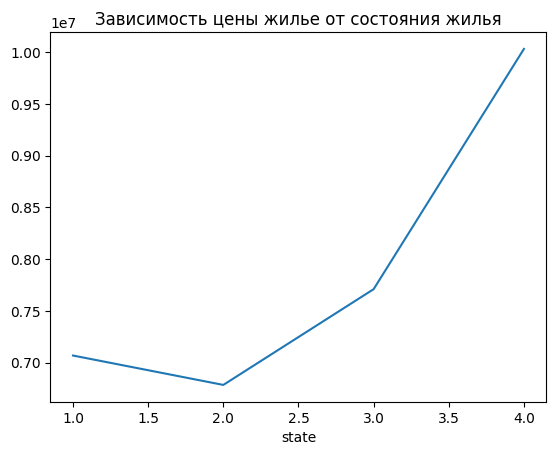

In [33]:
df_full[mask].groupby('state')['price_doc'].mean().plot()
ax = plt.gca()
ax.set_title('Зависимость цены жилье от состояния жилья') # Явная корреляция с категориальным признаком state

## Проверим гипотезу влияет ли средняя продолжительность жизни на цену жилья

Text(0.5, 1.0, 'life expecation to salary')

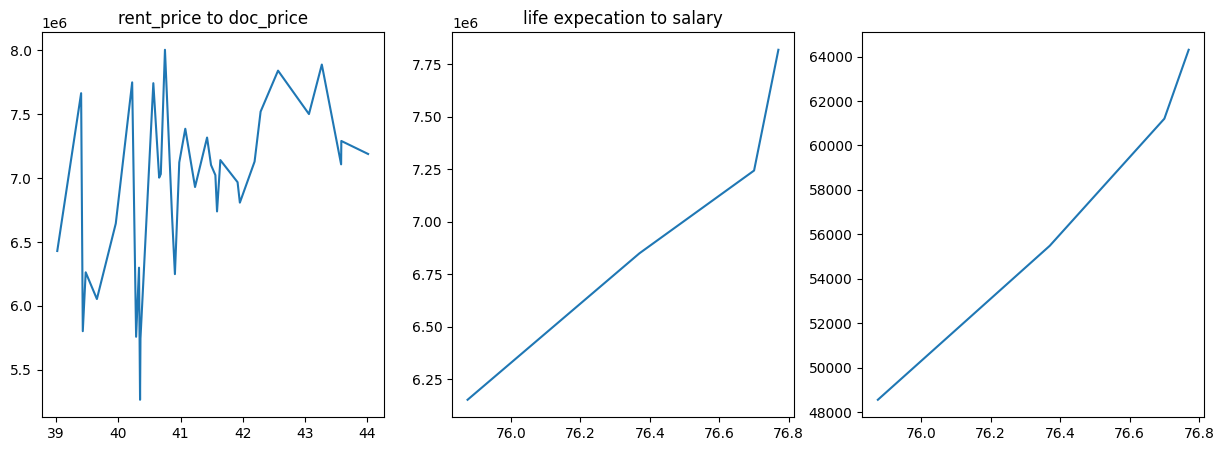

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax1.plot(df_full.groupby('average_rent_price')['price_doc'].mean()) # Явного тренда нет
ax1.set_title('rent_price to doc_price')

ax2.plot(df_full.groupby('average_life_exp')['price_doc'].mean()) # Есть прямая линейная зависимость
ax2.set_title('life expecation to doc_price')

ax3.plot(df_full.groupby('average_life_exp')['salary'].mean()) # Объясняет предыдущую зависимость, в принципе очевидную
ax2.set_title('life expecation to salary')

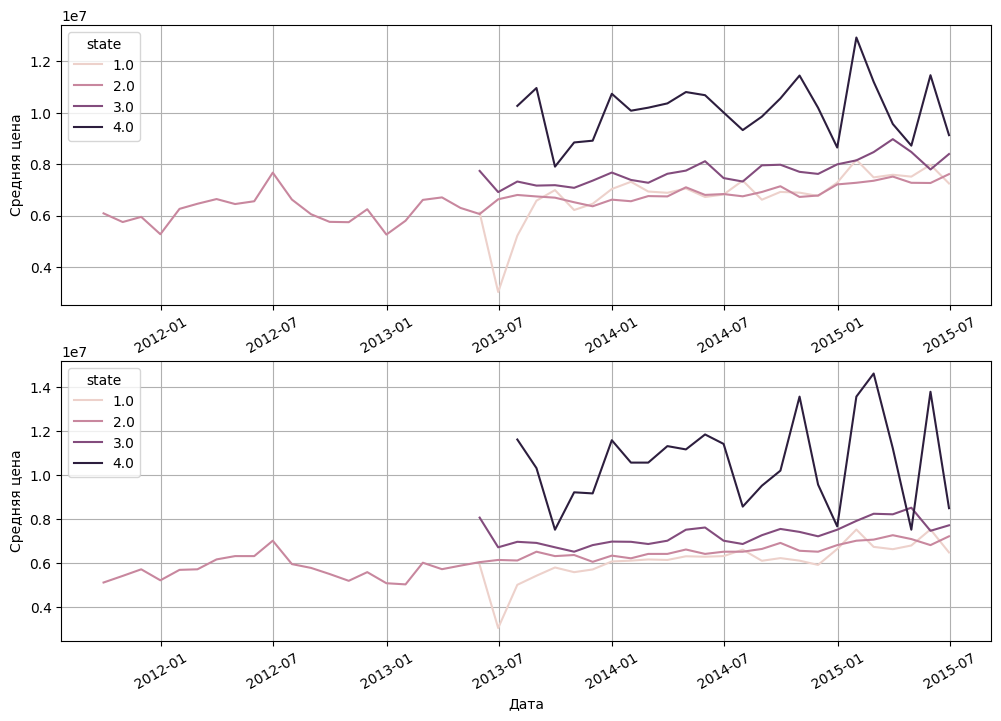

In [95]:
grouped_by_date = df_full.groupby([pd.Grouper(key='timestamp', freq="1M"), 
                                   pd.Grouper(key='state')])['price_doc'].agg(['mean', 'median'])
grouped_by_date = grouped_by_date.reset_index()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
line_plot_mean = sns.lineplot(data=grouped_by_date,
                         x='timestamp',
                         y='mean',
                         hue='state',
                         ax=axes[0])

line_plot_median = sns.lineplot(data=grouped_by_date,
                         x='timestamp',
                         y='median',
                         hue='state',
                         ax=axes[1])

for plot in (line_plot_mean, line_plot_median):
    plot.set_xlabel('Дата')
    plot.set_ylabel('Средняя цена')
    plot.xaxis.set_tick_params(rotation=30)
    plot.grid(True)

# Средняя и медиана цена очень сильно скачет для квартир с состоянием `4`.
# Возможно Стоит исключить эти квартиры из анализа. Или анализировать их отдельно
# В целом видно что циклически цены падают и растут, но в основном виден небольшой рост в районе 5-7% за год.

# Общий вывод:
По ощущениям в последнем пункте нужно было найти какую-то жемчужину, с чем я не справился.
Визуализация кажется очень сложной и не имеющей четких правил механикой

Также во время работы над последним пунктом заметил также ошибки с сглаживанием значений категориальных столбцов и исправил их, в целом хочется углубляться в это